## predicting in terms of probability for each loan transaction whether the customer will be paying the loaned amount within 5 days of taking the loan

this notebook is using various python based machine learning libraries to build a model capable of predicting the given problem

### problem definition how we approach

in a statement we are exploring is binary classification(a sample can only be one or two things)

## evalution

evaluting the problem using various evalution metrics

In [1]:
#importing libraries for data loading and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import flatten
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df_credit=pd.read_csv(r'C:\Users\Rohan\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv')

In [3]:
df_credit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
# checking their features,shape,dupicate value and non values in the dataset

In [5]:
# features in the dataset
df_credit.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
## most features have float and integer values while two feature has object

In [7]:
## checking rows and columns
df_credit.shape

(209593, 37)

In [8]:
## the dataset have 209593 columns and 37 rows

In [9]:
## dataset contain any null values
df_credit.isnull()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209589,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209590,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df_credit.isnull().values.any()

False

In [11]:
## there is no null values in the given dataset

In [12]:
## total no. of empty rows 
df_credit.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [13]:
## total no. of unique value in each feature
for col in df_credit.columns.values:
    print("total no. of unique values of {}:{}".format(col,df_credit[col].nunique))

total no. of unique values of Unnamed: 0:<bound method IndexOpsMixin.nunique of 0              1
1              2
2              3
3              4
4              5
           ...  
209588    209589
209589    209590
209590    209591
209591    209592
209592    209593
Name: Unnamed: 0, Length: 209593, dtype: int64>
total no. of unique values of label:<bound method IndexOpsMixin.nunique of 0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64>
total no. of unique values of msisdn:<bound method IndexOpsMixin.nunique of 0         21408I70789
1         76462I70374
2         17943I70372
3         55773I70781
4         03813I82730
             ...     
209588    22758I85348
209589    95583I84455
209590    28556I85350
209591    59712I82733
209592    65061I85339
Name: msisdn, Length: 209593, dtype: object>
total no. of unique values of aon:<bound method IndexOpsMixin.nunique of

In [14]:
## checking statistical information
df_credit.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [15]:
## some values have negative values

In [16]:
## dropping those feature which don't have any  important information
df_credit.drop(['Unnamed: 0','pcircle','msisdn'],axis=1,inplace=True)
df_credit

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


# exploratory data analysis

In [17]:
#checking for negative values as it means the value is below the mean

In [18]:
(df_credit.drop(['pdate'],axis=1) >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

## some of the features can have negative value so dropping some features

In [19]:
df_credit.drop(['rental30','rental90','pdate'],axis=1,inplace=True)

In [20]:
# making a loop which drop all the negative values
index=[]
for cols in df_credit.columns.values:
    Index_1=df_credit[df_credit[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)
                                

9922

In [21]:
# dropping the negative values where the negative value dont make sens
df_credit.drop(index_fl,inplace=True)

In [22]:
# checking the changes
(df_credit >= 0).all(0)

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [23]:
#checking the dataset
df_credit_new=pd.read_csv(r'C:\Users\Rohan\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv')

In [24]:
df_credit_new

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [25]:
#now adding the rental30 and rental90
df_credit['rental30']=df_credit_new['rental30']
df_credit['rental90']=df_credit_new['rental90']
df_credit['pdate']=df_credit_new['pdate']

In [26]:
# checking the dataset again
df_credit

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,pdate
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,2016-07-20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,2016-08-10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,2016-08-19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,2016-06-06
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1.0,0.0,4048,3,2.0,10404.0,...,0.0,2.0,12,6,0.0,1.000000,1.000000,1089.19,1089.19,2016-06-17
209589,1,1075.0,36.936000,36.936000,4.0,0.0,773,4,1.0,3092.0,...,0.0,3.0,18,6,0.0,1.000000,1.000000,1728.36,1728.36,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,3.0,0.0,1539,5,8.0,9334.0,...,0.0,6.0,54,12,0.0,4.000000,3.833333,5861.83,8893.20,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,2.0,38.0,773,5,4.0,12154.0,...,0.0,3.0,24,12,0.0,0.000000,10.500000,411.83,984.58,2016-07-25


In [27]:
#checking the corelation between labels and features
df_credit.corr()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
label,1.000000,-0.003257,0.161804,0.160075,0.003291,0.000777,0.120954,0.226554,0.000269,1.935857e-01,...,0.000591,0.041934,0.005160,0.192480,0.080027,0.033279,0.042385,0.042864,0.053048,0.070185
aon,-0.003257,1.000000,0.000969,0.000218,0.001826,-0.001632,0.003507,-0.003179,-0.001087,4.208767e-04,...,-0.002675,0.005314,-0.000893,-0.002683,-0.001383,0.003436,0.002303,0.002546,-0.000946,-0.000880
daily_decr30,0.161804,0.000969,1.000000,0.977540,-0.000091,-0.002064,0.275021,0.446659,-0.000877,6.345488e-01,...,0.000184,-0.012161,0.008838,0.559284,0.398443,-0.037608,0.023488,0.043461,0.441569,0.457884
daily_decr90,0.160075,0.000218,0.977540,1.000000,0.000346,-0.002327,0.263310,0.421963,-0.000623,6.017200e-01,...,0.000193,-0.006041,0.009320,0.563157,0.395467,-0.034942,0.016062,0.037270,0.434178,0.470832
last_rech_date_ma,0.003291,0.001826,-0.000091,0.000346,1.000000,0.001871,-0.000335,0.003927,-0.001615,1.662917e-03,...,0.001046,0.001615,-0.000139,0.000421,-0.001415,0.002580,-0.002574,-0.002084,-0.001351,-0.002128
last_rech_date_da,0.000777,-0.001632,-0.002064,-0.002327,0.001871,1.000000,0.000086,0.001216,0.001232,-2.057615e-04,...,0.000031,-0.001007,-0.000903,-0.000035,0.001165,-0.003441,-0.000111,0.000304,0.003119,0.002617
last_rech_amt_ma,0.120954,0.003507,0.275021,0.263310,-0.000335,0.000086,1.000000,-0.009934,0.002783,4.375519e-01,...,0.000788,0.027880,0.000020,0.008395,0.147631,0.020702,-0.031179,-0.018116,0.125913,0.119665
cnt_ma_rech30,0.226554,-0.003179,0.446659,0.421963,0.003927,0.001216,-0.009934,1.000000,0.001209,6.540828e-01,...,0.000337,-0.069021,0.014483,0.682555,0.170374,-0.073029,0.038880,0.011622,0.230352,0.226592
fr_ma_rech30,0.000269,-0.001087,-0.000877,-0.000623,-0.001615,0.001232,0.002783,0.001209,1.000000,3.948041e-04,...,-0.001031,-0.000534,0.003557,0.002458,-0.001883,-0.001517,0.000837,0.000487,-0.001688,-0.000975
sumamnt_ma_rech30,0.193586,0.000421,0.634549,0.601720,0.001663,-0.000206,0.437552,0.654083,0.000395,1.000000e+00,...,0.001732,-0.035825,0.009307,0.480385,0.255176,-0.043106,-0.004216,-0.017576,0.270852,0.257157


# univariate analysis

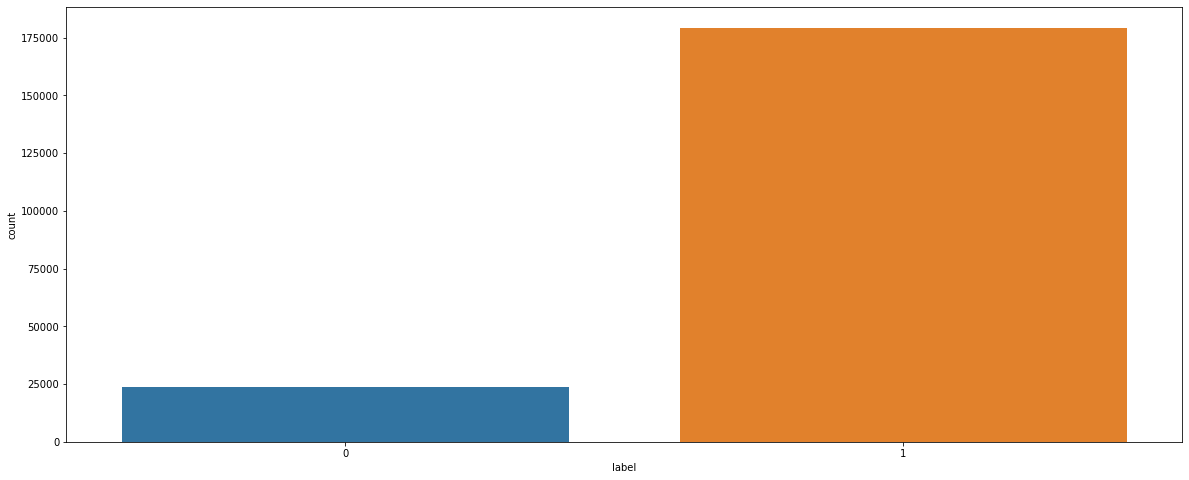

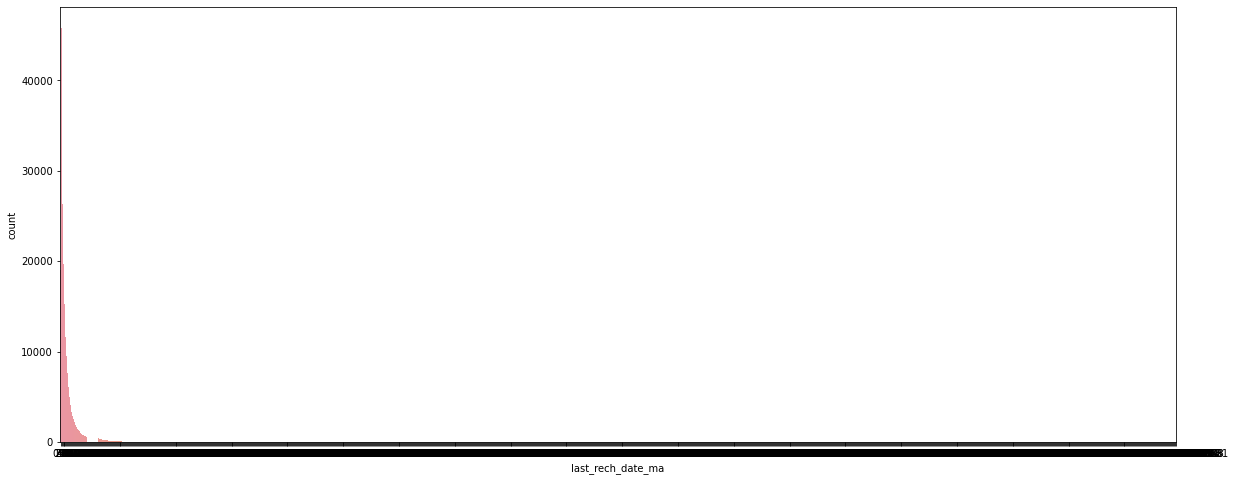

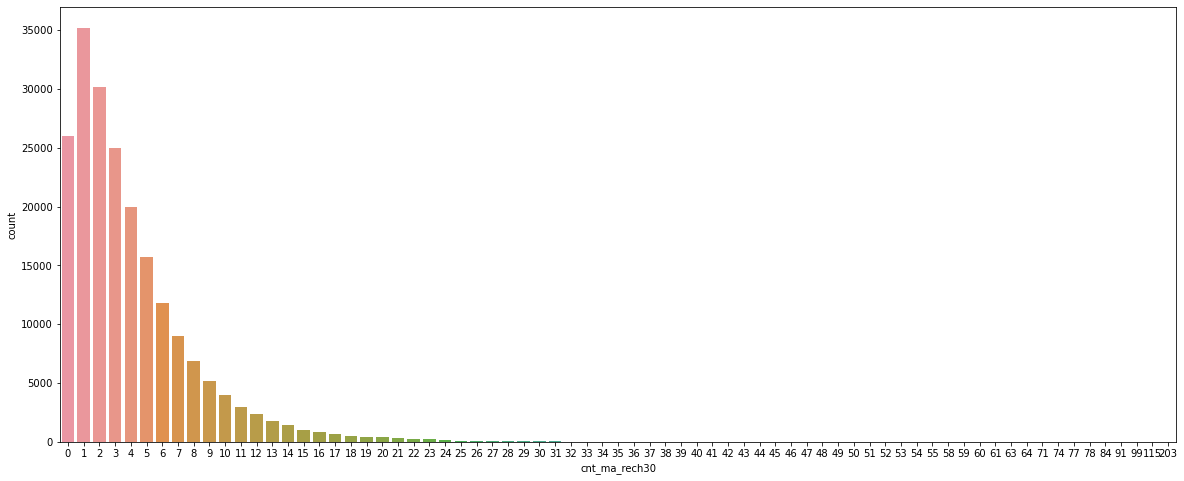

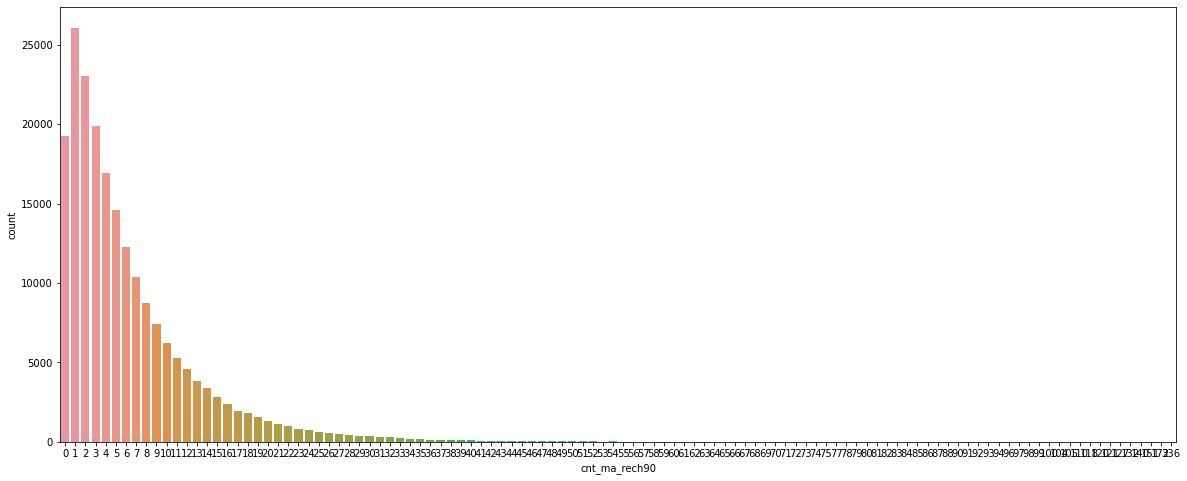

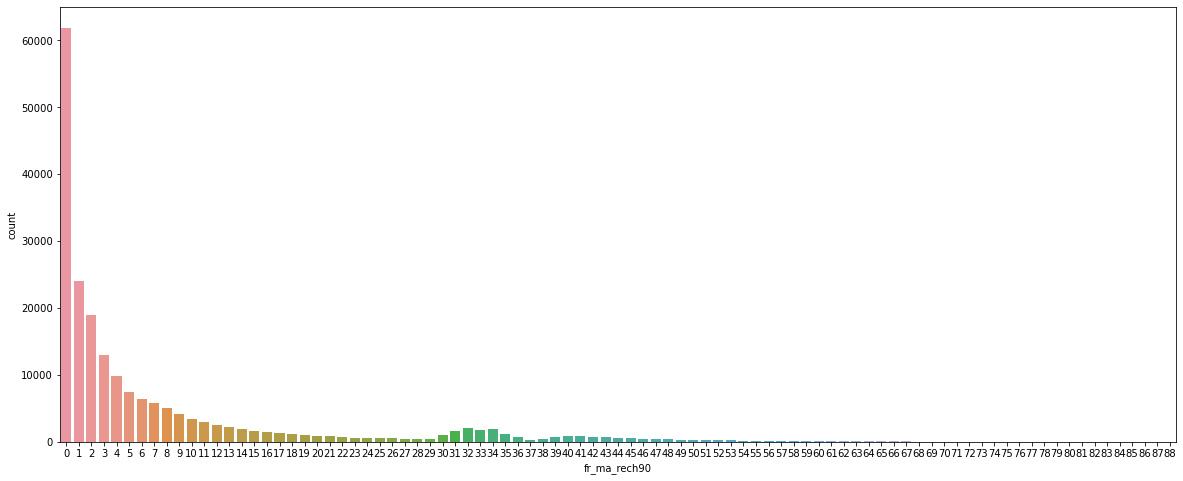

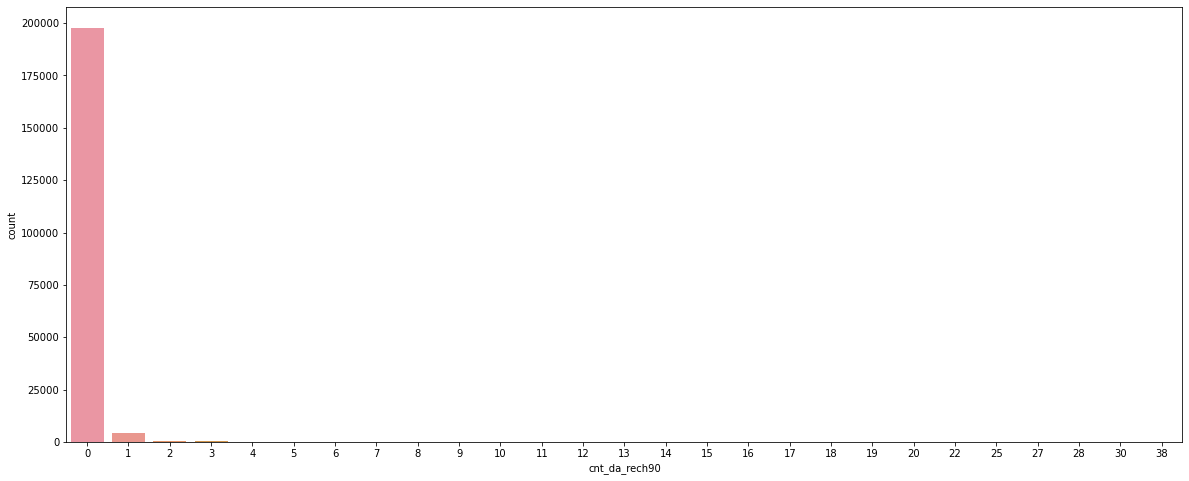

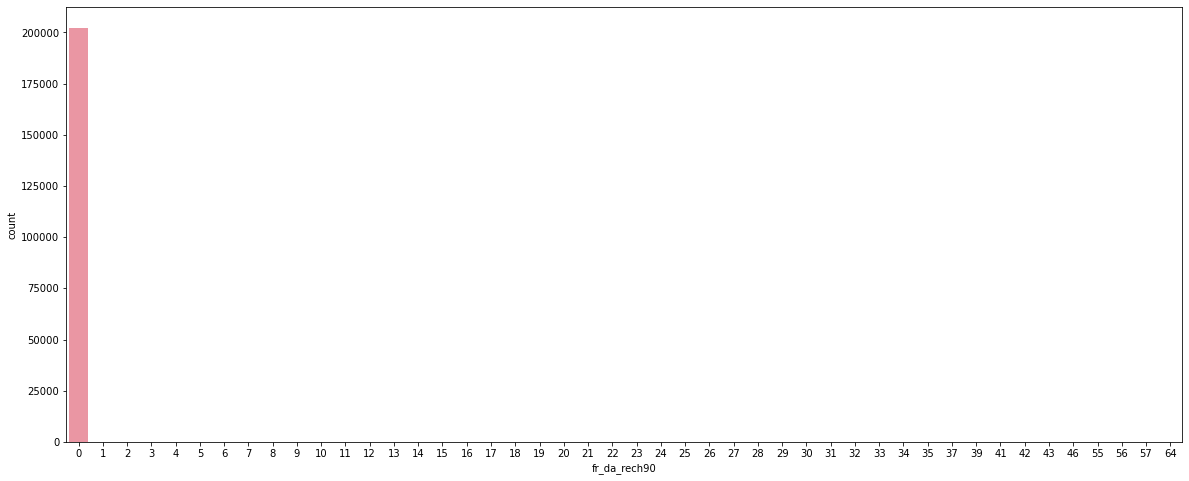

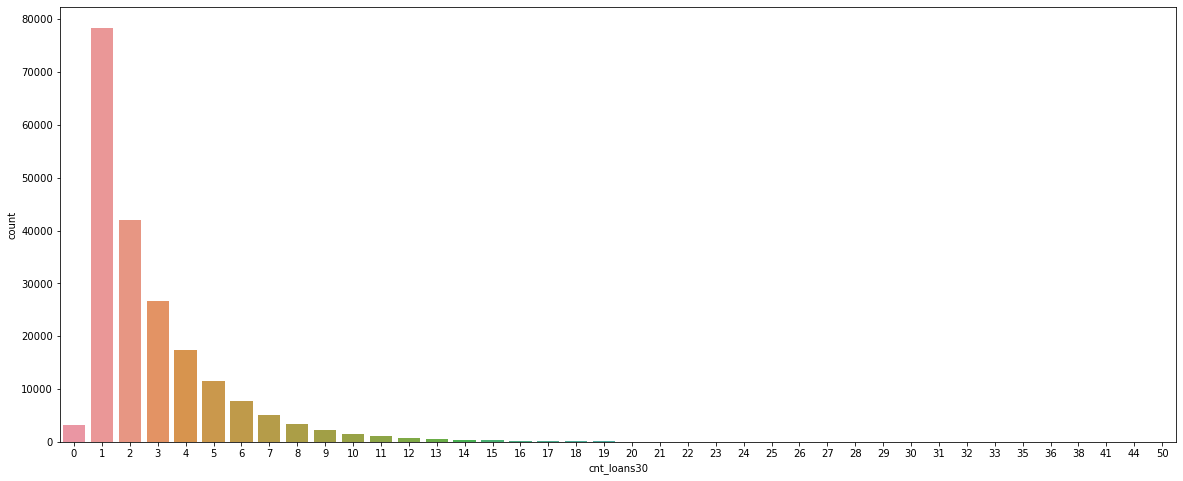

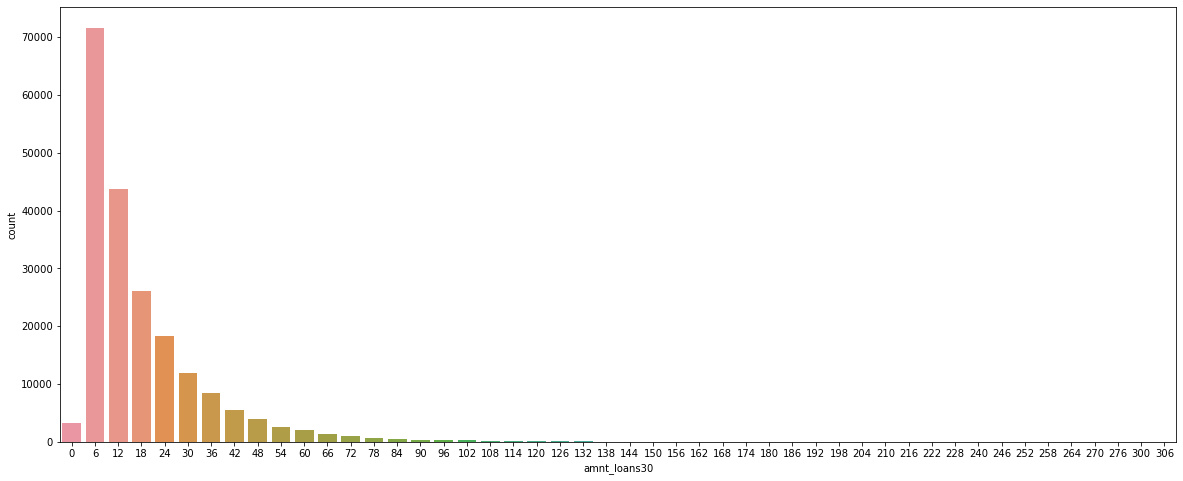

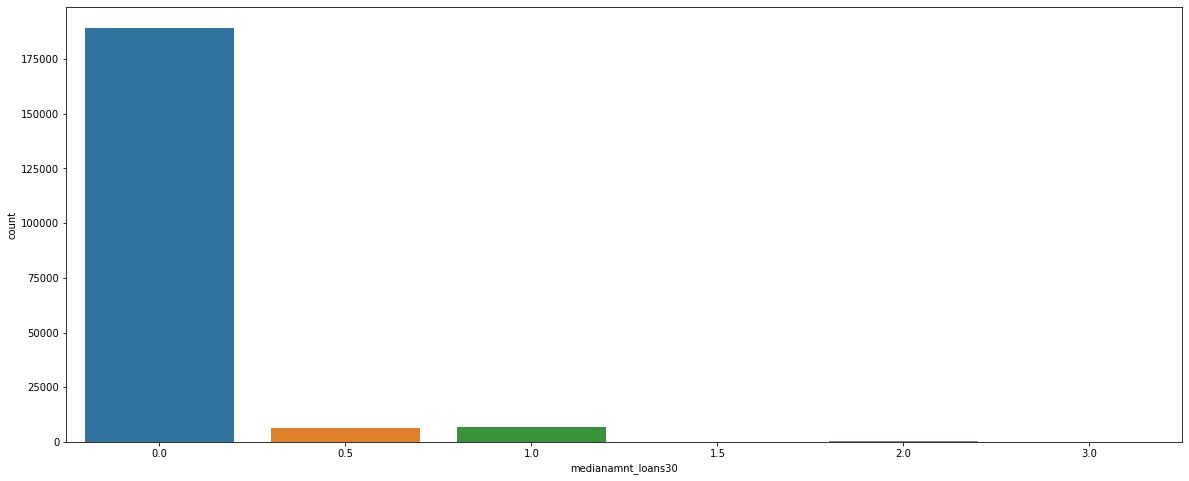

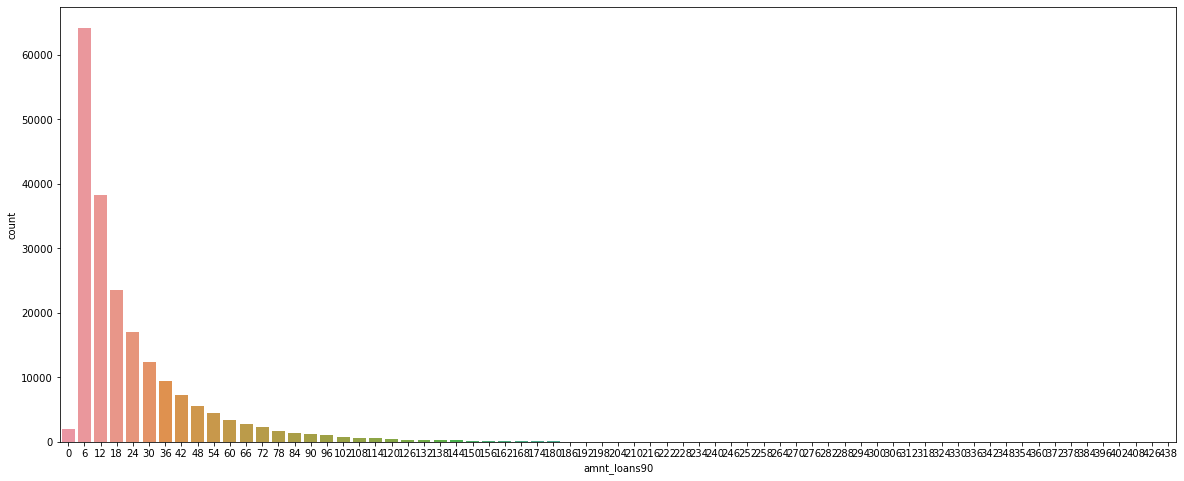

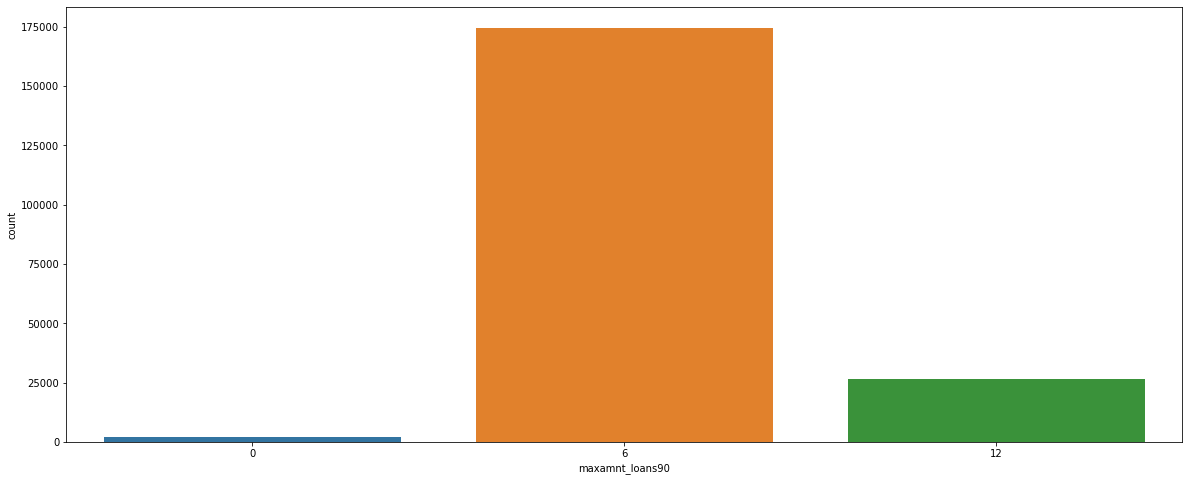

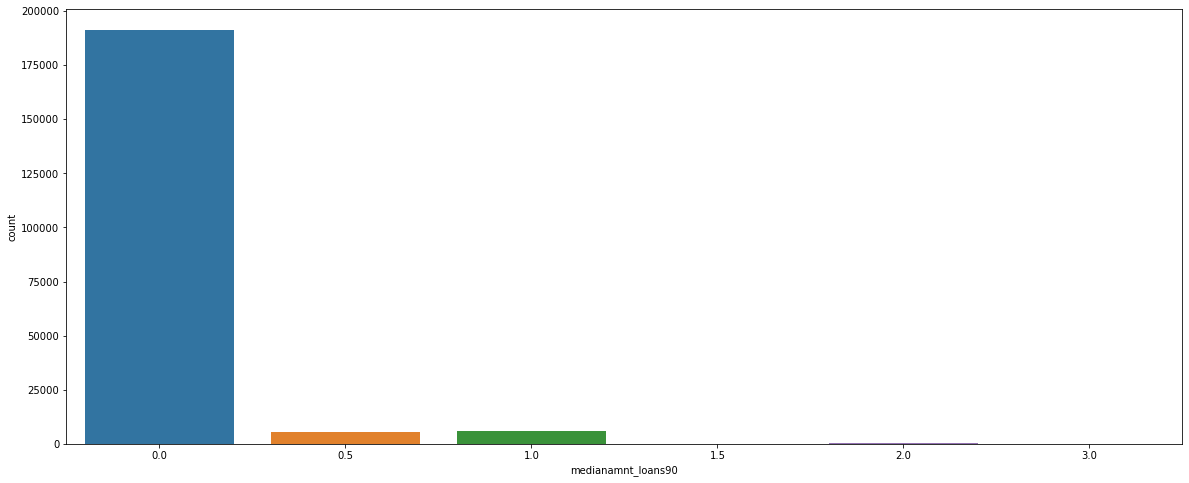

In [28]:
#for loop features to plot the graph
list=['label','last_rech_date_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_credit)
    plt.show()


label                      AxesSubplot(0.125,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr30            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
daily_decr90               AxesSubplot(0.125,0.763028;0.227941x0.053169)
last_rech_date_ma       AxesSubplot(0.398529,0.763028;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.672059,0.763028;0.227941x0.053169)
last_rech_amt_ma           AxesSubplot(0.125,0.699225;0.227941x0.053169)
cnt_ma_rech30           AxesSubplot(0.398529,0.699225;0.227941x0.053169)
fr_ma_rech30            AxesSubplot(0.672059,0.699225;0.227941x0.053169)
sumamnt_ma_rech30          AxesSubplot(0.125,0.635423;0.227941x0.053169)
medianamnt_ma_rech30    AxesSubplot(0.398529,0.635423;0.227941x0.053169)
medianmarechprebal30    AxesSubplot(0.672059,0.635423;0.227941x0.053169)
cnt_ma_rech90               AxesSubplot(0.125,0.57162;0.227941x0.053169)
fr_ma_rech90             AxesSubplot(0.398529,0.571

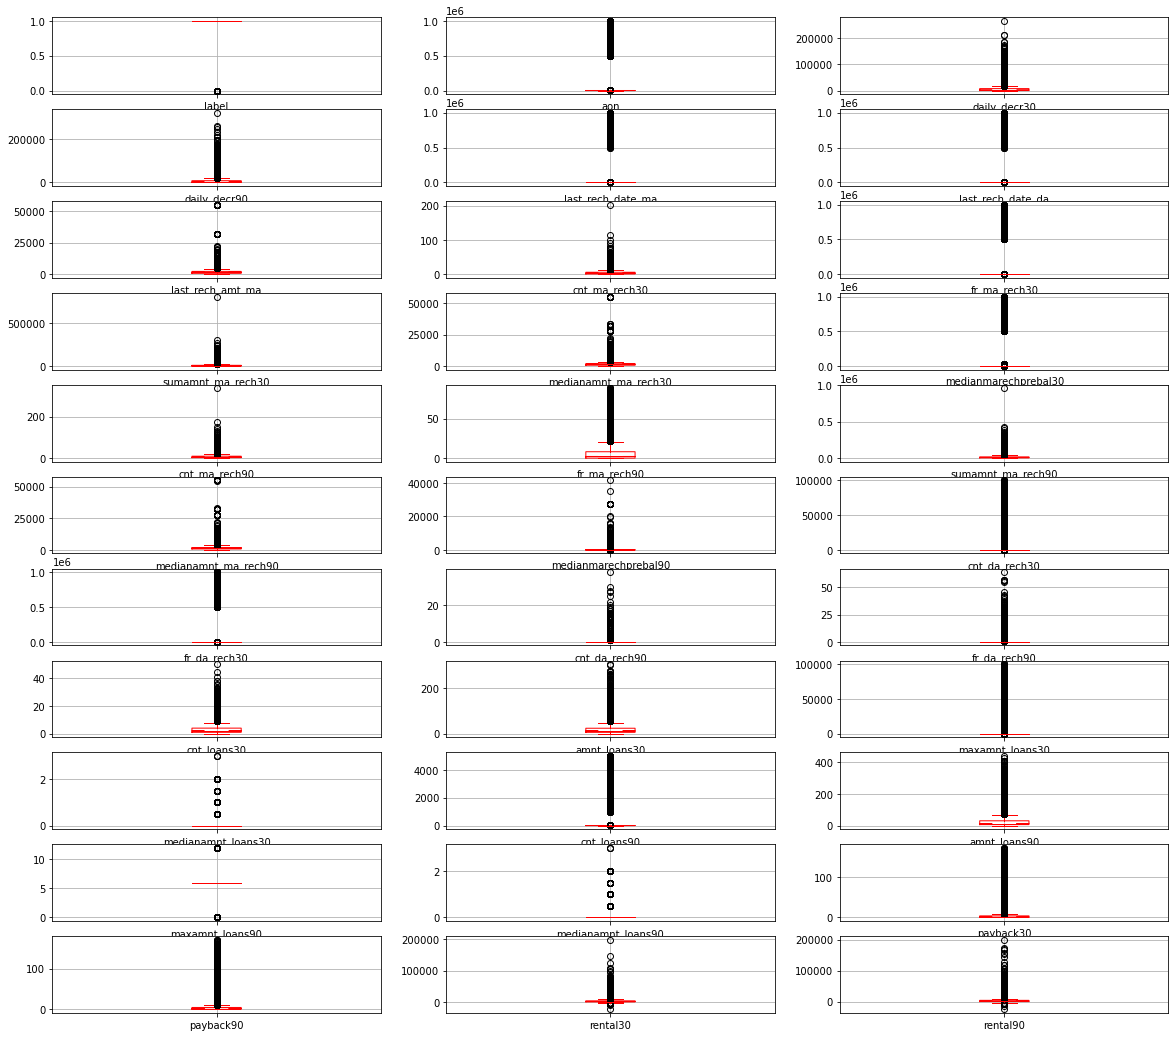

In [29]:
# ploting boxplot to find any outliers
df_credit.drop('pdate',axis=1).plot(kind='box',subplots=True,layout=(12,3),figsize=(20,20),grid=True,notch=True,color='red',legend=True)

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>],
       [<AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>],
       [<AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:

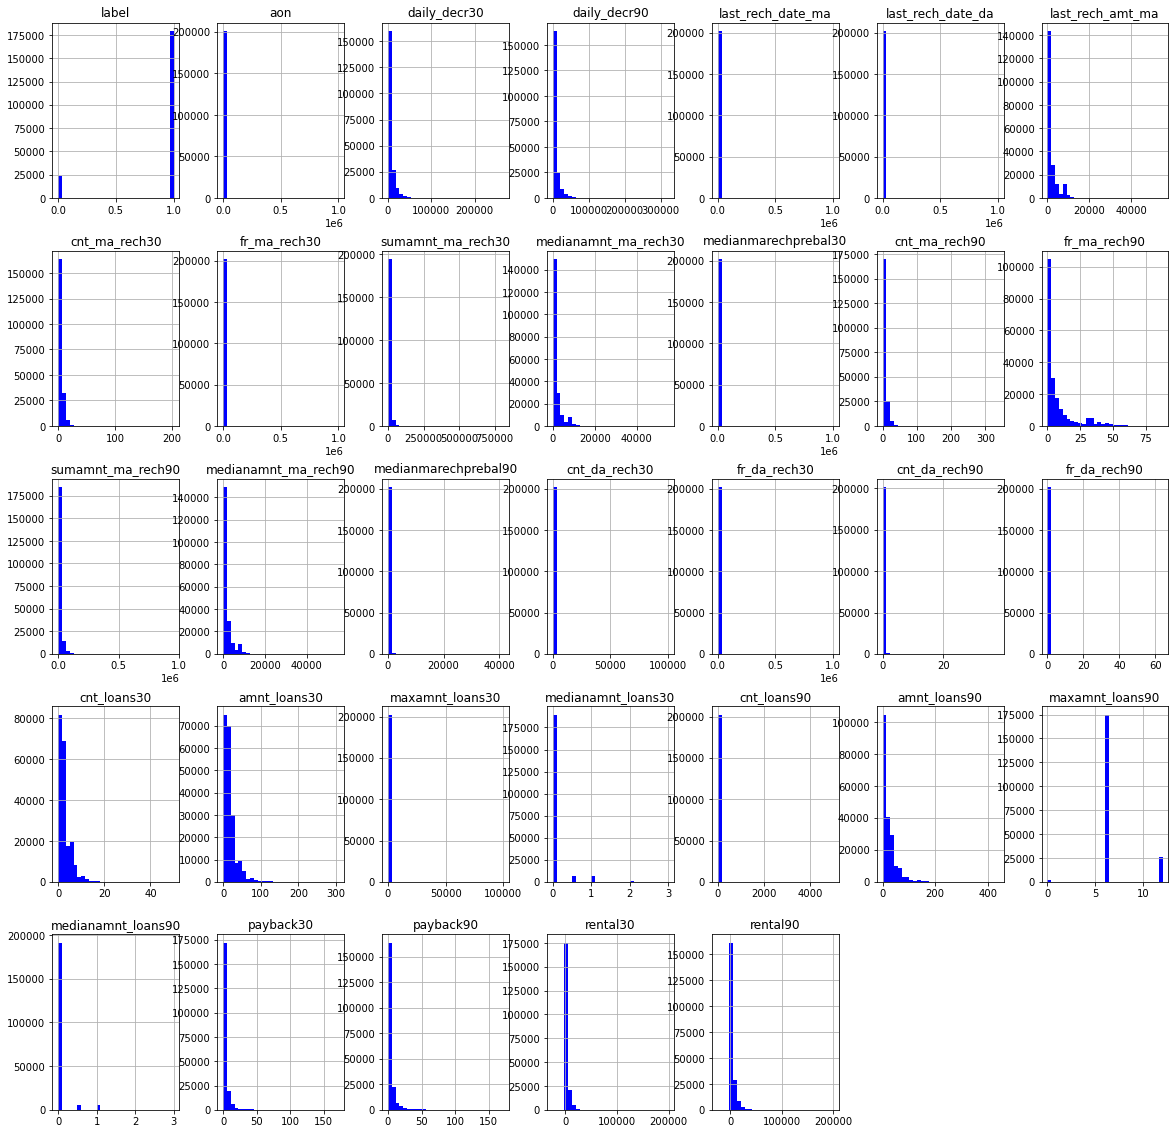

In [30]:
# checking the disturbution using the histogram plot
df_credit.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

#### from the above graph we can say that data is rightly skewed

In [31]:
#droping the date part for outlier removal
df_credit.drop('pdate',axis=1,inplace=True)

In [32]:
## checking corelation among the features
df_credit.corr()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
label,1.000000,-0.003257,0.161804,0.160075,0.003291,0.000777,0.120954,0.226554,0.000269,1.935857e-01,...,0.000591,0.041934,0.005160,0.192480,0.080027,0.033279,0.042385,0.042864,0.053048,0.070185
aon,-0.003257,1.000000,0.000969,0.000218,0.001826,-0.001632,0.003507,-0.003179,-0.001087,4.208767e-04,...,-0.002675,0.005314,-0.000893,-0.002683,-0.001383,0.003436,0.002303,0.002546,-0.000946,-0.000880
daily_decr30,0.161804,0.000969,1.000000,0.977540,-0.000091,-0.002064,0.275021,0.446659,-0.000877,6.345488e-01,...,0.000184,-0.012161,0.008838,0.559284,0.398443,-0.037608,0.023488,0.043461,0.441569,0.457884
daily_decr90,0.160075,0.000218,0.977540,1.000000,0.000346,-0.002327,0.263310,0.421963,-0.000623,6.017200e-01,...,0.000193,-0.006041,0.009320,0.563157,0.395467,-0.034942,0.016062,0.037270,0.434178,0.470832
last_rech_date_ma,0.003291,0.001826,-0.000091,0.000346,1.000000,0.001871,-0.000335,0.003927,-0.001615,1.662917e-03,...,0.001046,0.001615,-0.000139,0.000421,-0.001415,0.002580,-0.002574,-0.002084,-0.001351,-0.002128
last_rech_date_da,0.000777,-0.001632,-0.002064,-0.002327,0.001871,1.000000,0.000086,0.001216,0.001232,-2.057615e-04,...,0.000031,-0.001007,-0.000903,-0.000035,0.001165,-0.003441,-0.000111,0.000304,0.003119,0.002617
last_rech_amt_ma,0.120954,0.003507,0.275021,0.263310,-0.000335,0.000086,1.000000,-0.009934,0.002783,4.375519e-01,...,0.000788,0.027880,0.000020,0.008395,0.147631,0.020702,-0.031179,-0.018116,0.125913,0.119665
cnt_ma_rech30,0.226554,-0.003179,0.446659,0.421963,0.003927,0.001216,-0.009934,1.000000,0.001209,6.540828e-01,...,0.000337,-0.069021,0.014483,0.682555,0.170374,-0.073029,0.038880,0.011622,0.230352,0.226592
fr_ma_rech30,0.000269,-0.001087,-0.000877,-0.000623,-0.001615,0.001232,0.002783,0.001209,1.000000,3.948041e-04,...,-0.001031,-0.000534,0.003557,0.002458,-0.001883,-0.001517,0.000837,0.000487,-0.001688,-0.000975
sumamnt_ma_rech30,0.193586,0.000421,0.634549,0.601720,0.001663,-0.000206,0.437552,0.654083,0.000395,1.000000e+00,...,0.001732,-0.035825,0.009307,0.480385,0.255176,-0.043106,-0.004216,-0.017576,0.270852,0.257157


In [33]:
# now droping the features having same corelation
df_credit.drop(["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30"],axis=1,inplace=True)

In [34]:
## checking the dataset
df_credit

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,272.0,3065.150000,2.0,0.0,1539,1539.0,7.50,2,21,...,0,0,2,6.0,2.0,12,6,0.0,29.000000,260.13
1,1,712.0,12124.750000,20.0,0.0,5787,5787.0,61.04,1,0,...,0,0,1,12.0,1.0,12,12,0.0,0.000000,3691.26
2,1,535.0,1398.000000,3.0,0.0,1539,1539.0,66.32,1,0,...,0,0,1,6.0,1.0,6,6,0.0,0.000000,900.13
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.00,1,0,...,0,0,2,6.0,2.0,12,6,0.0,0.000000,159.42
4,1,947.0,150.619333,4.0,0.0,2309,2309.0,29.00,8,2,...,0,0,7,6.0,7.0,42,6,0.0,2.333333,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1.0,0.0,4048,3178.0,91.81,3,2,...,0,0,2,6.0,2.0,12,6,0.0,1.000000,1089.19
209589,1,1075.0,36.936000,4.0,0.0,773,773.0,161.30,6,2,...,0,0,3,6.0,3.0,18,6,0.0,1.000000,1728.36
209590,1,1013.0,11904.350000,3.0,0.0,1539,1539.0,51.13,11,5,...,0,0,4,12.0,6.0,54,12,0.0,3.833333,8893.20
209591,1,1732.0,12574.370000,2.0,38.0,773,773.0,164.00,6,4,...,1,0,2,12.0,3.0,24,12,0.0,10.500000,984.58


#### some values are unimagineable

In [35]:
# removing the outliers
# before checking the outliers we should know the thresold values of every features according to data provided
df_clean = df_credit[df_credit['last_rech_date_ma'] < 250]  
df_clean = df_clean[df_clean['last_rech_date_da'] <= 115]
df_clean = df_clean[df_clean['aon'] < 2500]
df_clean = df_clean[df_clean['cnt_loans90'] <= 71]
df_clean = df_clean[df_clean['maxamnt_loans30'] <= 12]

In [36]:
# checking clean dataset
df_clean

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,272.0,3065.150000,2.0,0.0,1539,1539.0,7.50,2,21,...,0,0,2,6.0,2.0,12,6,0.0,29.000000,260.13
1,1,712.0,12124.750000,20.0,0.0,5787,5787.0,61.04,1,0,...,0,0,1,12.0,1.0,12,12,0.0,0.000000,3691.26
2,1,535.0,1398.000000,3.0,0.0,1539,1539.0,66.32,1,0,...,0,0,1,6.0,1.0,6,6,0.0,0.000000,900.13
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.00,1,0,...,0,0,2,6.0,2.0,12,6,0.0,0.000000,159.42
4,1,947.0,150.619333,4.0,0.0,2309,2309.0,29.00,8,2,...,0,0,7,6.0,7.0,42,6,0.0,2.333333,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1.0,0.0,4048,3178.0,91.81,3,2,...,0,0,2,6.0,2.0,12,6,0.0,1.000000,1089.19
209589,1,1075.0,36.936000,4.0,0.0,773,773.0,161.30,6,2,...,0,0,3,6.0,3.0,18,6,0.0,1.000000,1728.36
209590,1,1013.0,11904.350000,3.0,0.0,1539,1539.0,51.13,11,5,...,0,0,4,12.0,6.0,54,12,0.0,3.833333,8893.20
209591,1,1732.0,12574.370000,2.0,38.0,773,773.0,164.00,6,4,...,1,0,2,12.0,3.0,24,12,0.0,10.500000,984.58


In [37]:
## checking the skewness
df_clean.skew()

label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

In [38]:
# removing skewness
for i in df_clean.drop(['label','rental90'],axis=1).columns:
    if df_clean.skew().loc[i]>0.55:
        df_clean[i]=np.log1p(df_clean[i])

In [39]:
df_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.090668
medianamnt_ma_rech90    -2.304321
medianmarechprebal90    -0.571072
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

### visualization after outlier removal

In [40]:
## checking unique value
df_clean.nunique()

label                        2
aon                       2368
daily_decr90            151238
last_rech_date_ma          110
last_rech_date_da          116
last_rech_amt_ma            69
medianamnt_ma_rech30       496
medianmarechprebal30     28613
cnt_ma_rech90              109
fr_ma_rech90                89
sumamnt_ma_rech90        31126
medianamnt_ma_rech90       592
medianmarechprebal90     27997
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 39
maxamnt_loans30              3
cnt_loans90                 63
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback90                 2350
rental90                135015
dtype: int64

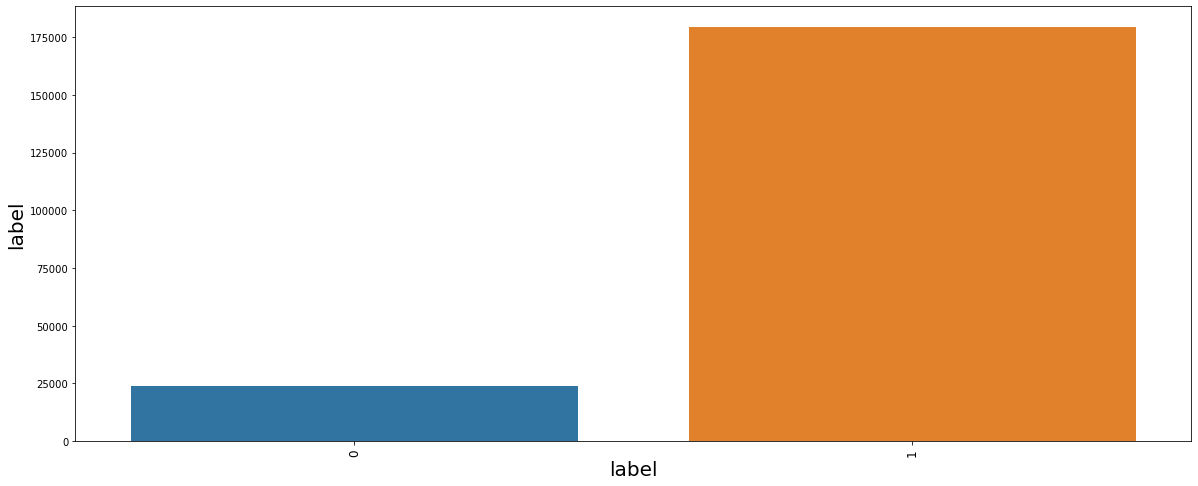

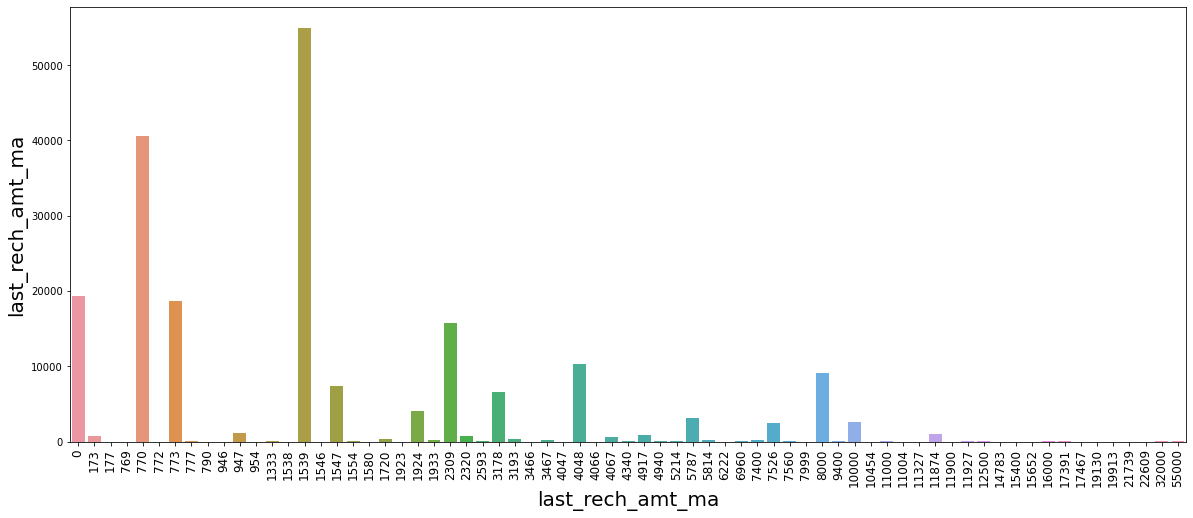

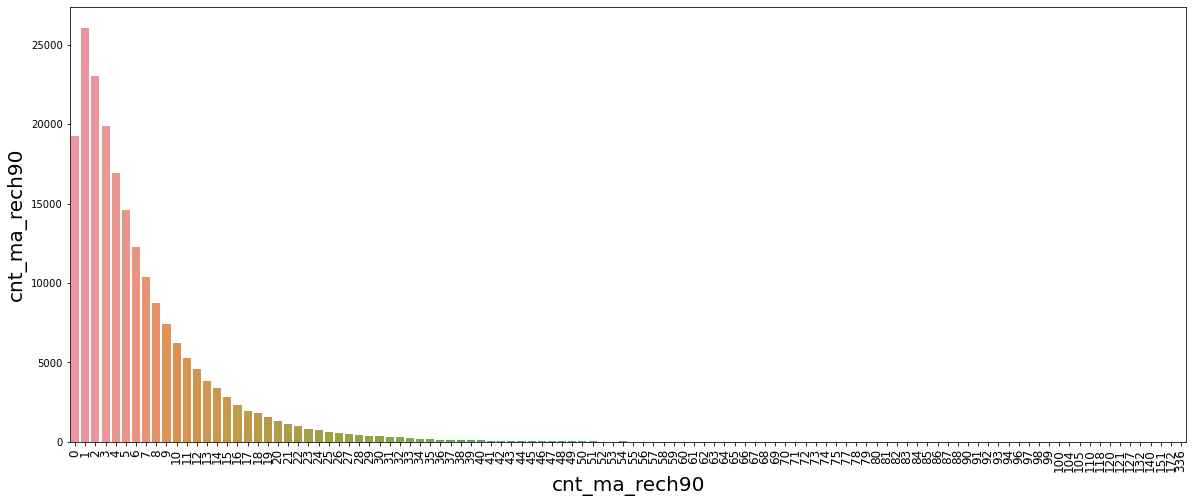

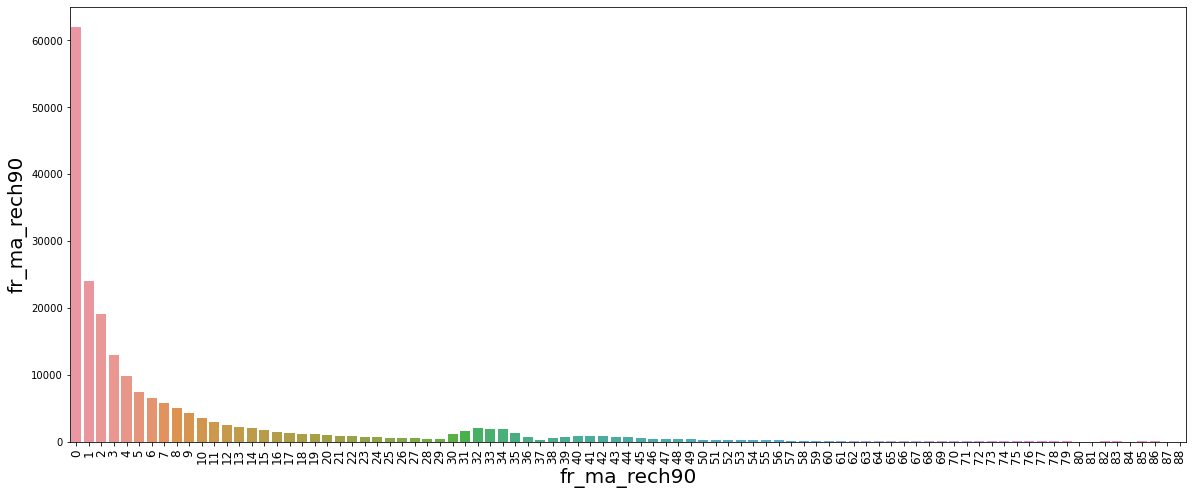

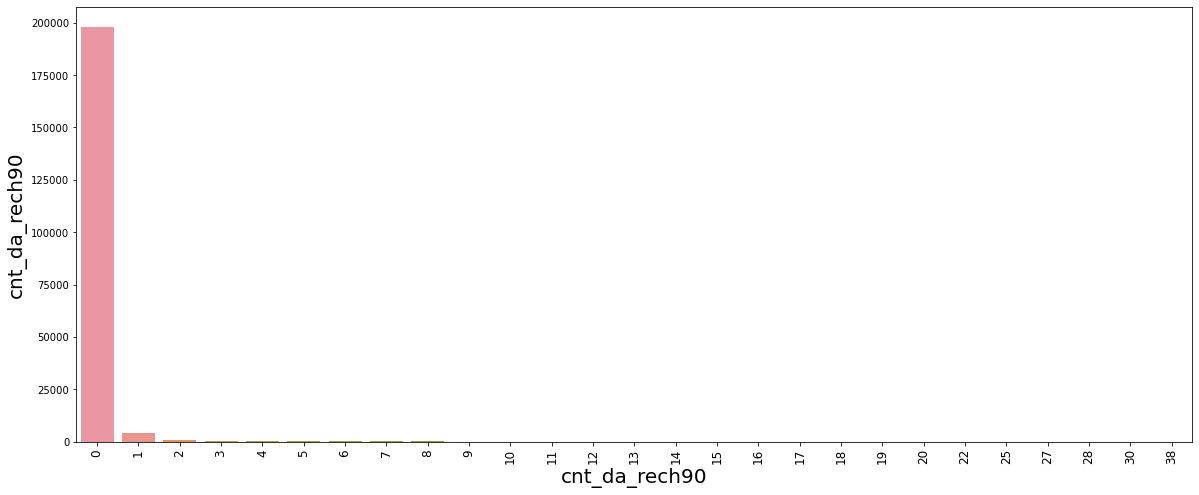

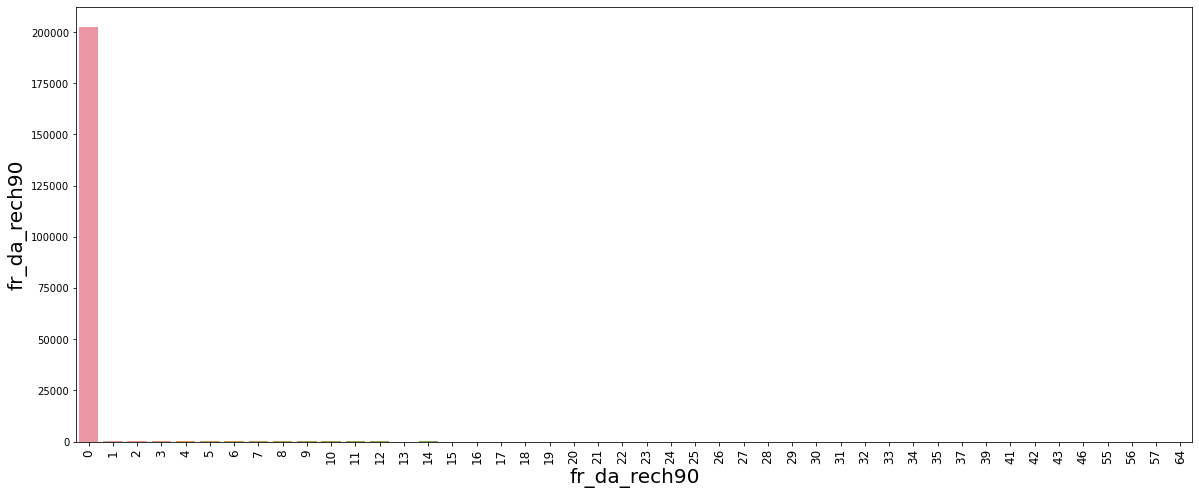

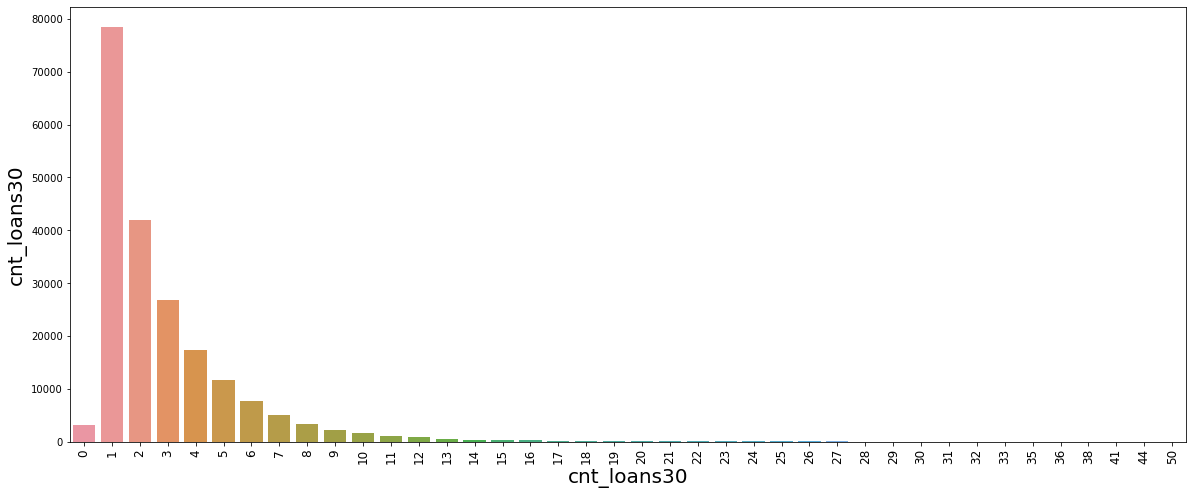

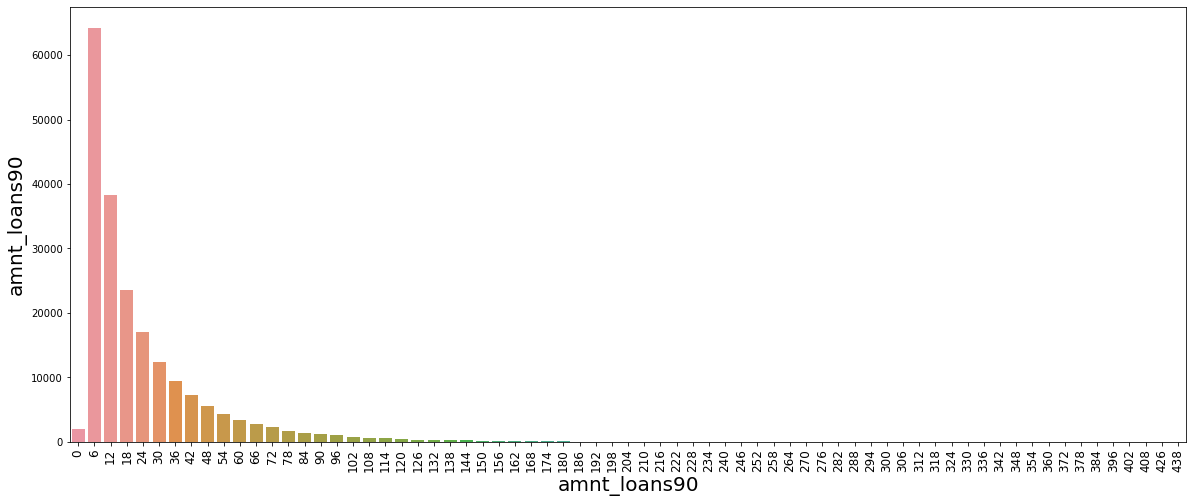

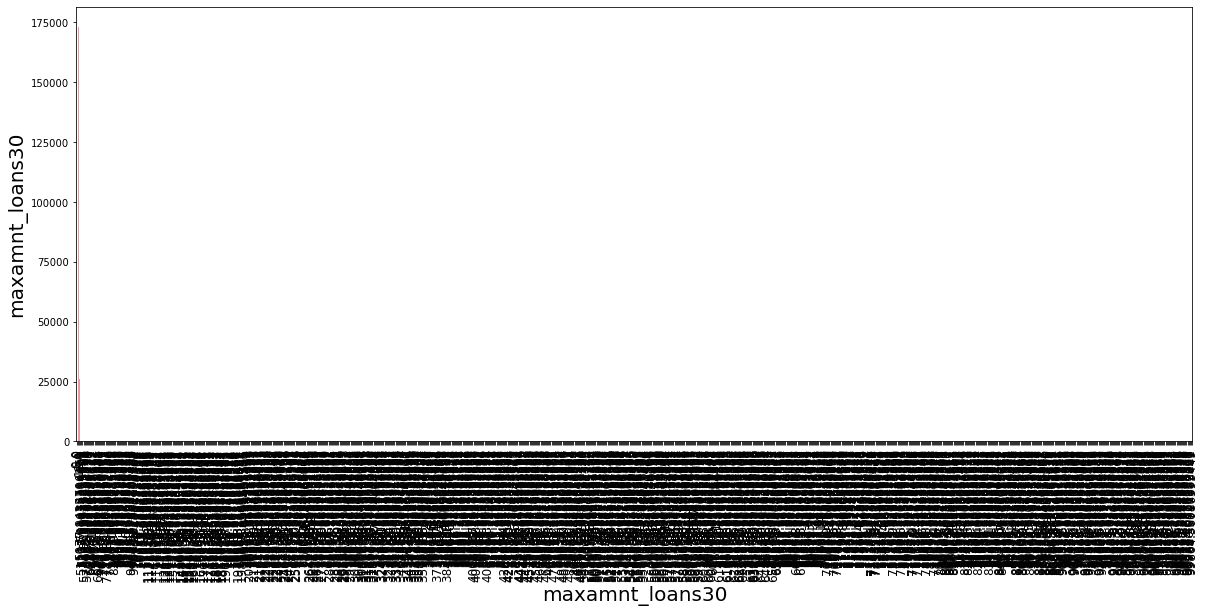

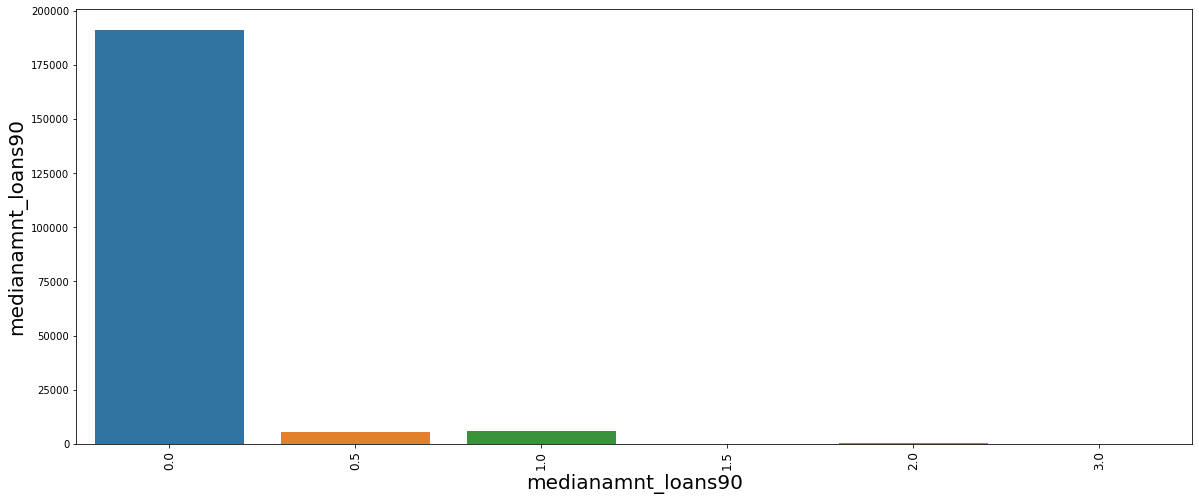

In [41]:
## for loop to visualize all the features

list=['label', 'last_rech_amt_ma','cnt_ma_rech90', 'fr_ma_rech90','cnt_da_rech90', 'fr_da_rech90',
      'cnt_loans30', 'amnt_loans90','maxamnt_loans30', 'medianamnt_loans90', ]
  
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_credit)
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel(f'{i}',fontsize=20)
    plt.show()           


array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:title={'center':'cnt_da_rech90'}>],
       [<AxesSubplot:title={'center':'fr_da_rech90'}>,
        <AxesSubplot:title={'center':'cnt_loans30'}>,
        <AxesSubplot:title={'center':'maxamnt_loans30'}>,
        <AxesSubplot:tit

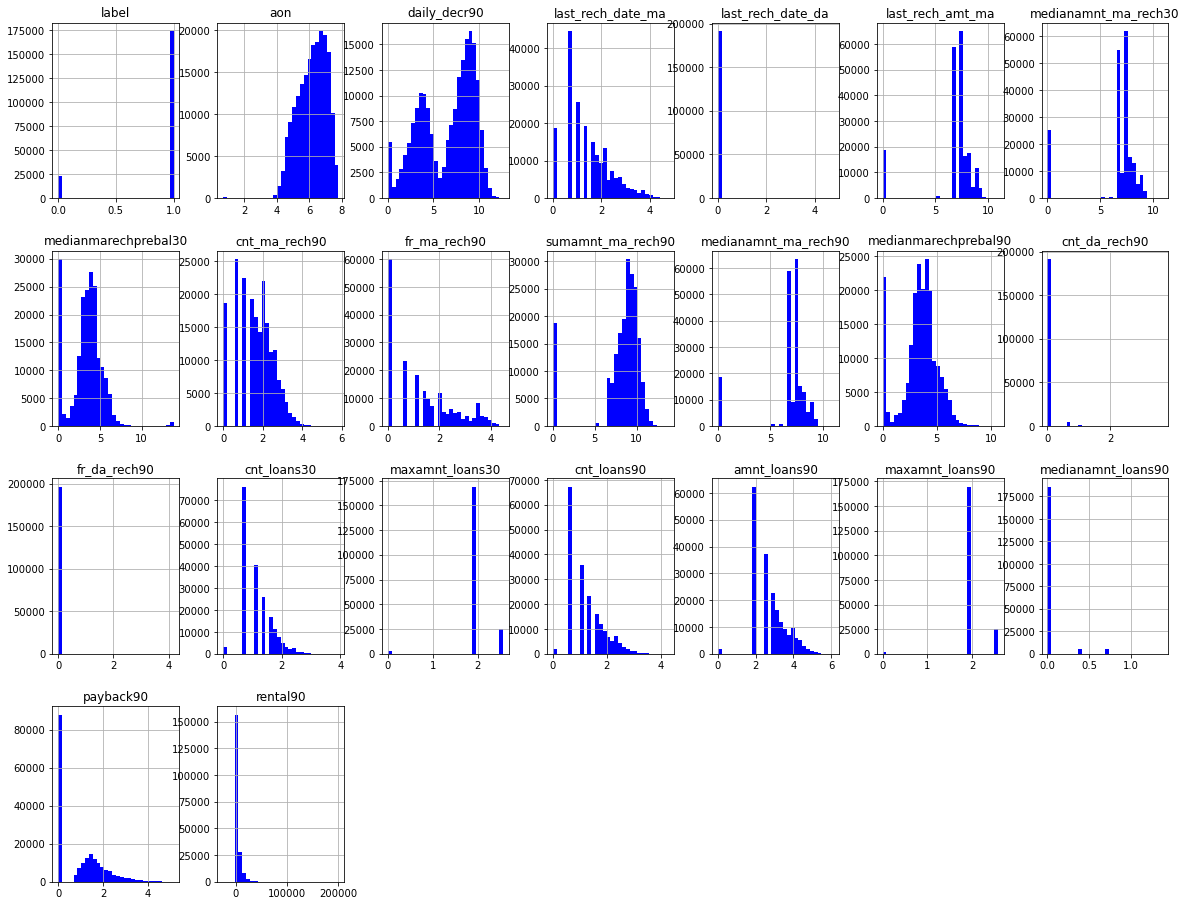

In [42]:
#ploting the histogram for normal disturbuition
df_clean.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

### now the data is normally disturbuted

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197074 entries, 0 to 209592
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 197074 non-null  int64  
 1   aon                   197074 non-null  float64
 2   daily_decr90          197074 non-null  float64
 3   last_rech_date_ma     197074 non-null  float64
 4   last_rech_date_da     197074 non-null  float64
 5   last_rech_amt_ma      197074 non-null  float64
 6   medianamnt_ma_rech30  197074 non-null  float64
 7   medianmarechprebal30  197074 non-null  float64
 8   cnt_ma_rech90         197074 non-null  float64
 9   fr_ma_rech90          197074 non-null  float64
 10  sumamnt_ma_rech90     197074 non-null  float64
 11  medianamnt_ma_rech90  197074 non-null  float64
 12  medianmarechprebal90  197074 non-null  float64
 13  cnt_da_rech90         197074 non-null  float64
 14  fr_da_rech90          197074 non-null  float64
 15  

## how much data is removed total-clean/total*100
## ((209593-197074)/209593)*100 = 5.97%
## total data removed is 5.97%

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197074 entries, 0 to 209592
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 197074 non-null  int64  
 1   aon                   197074 non-null  float64
 2   daily_decr90          197074 non-null  float64
 3   last_rech_date_ma     197074 non-null  float64
 4   last_rech_date_da     197074 non-null  float64
 5   last_rech_amt_ma      197074 non-null  float64
 6   medianamnt_ma_rech30  197074 non-null  float64
 7   medianmarechprebal30  197074 non-null  float64
 8   cnt_ma_rech90         197074 non-null  float64
 9   fr_ma_rech90          197074 non-null  float64
 10  sumamnt_ma_rech90     197074 non-null  float64
 11  medianamnt_ma_rech90  197074 non-null  float64
 12  medianmarechprebal90  197074 non-null  float64
 13  cnt_da_rech90         197074 non-null  float64
 14  fr_da_rech90          197074 non-null  float64
 15  

In [45]:
df_clean.describe()

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
count,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,...,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000,197074.000000
mean,0.883145,6.165001,6.501437,1.483485,0.091081,6.708977,6.417064,3.359792,1.629827,1.366985,...,0.022564,0.009193,1.174300,1.994621,1.321503,2.830003,2.007318,0.033006,1.001298,3542.600243
std,0.321248,0.870110,2.924345,0.931668,0.556091,2.288109,2.542768,1.929863,0.885039,1.230499,...,0.150553,0.150559,0.535192,0.326880,0.645018,0.865199,0.289144,0.138901,1.054174,5808.679857
min,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24720.580000
25%,1.000000,5.517453,3.891412,0.693147,0.000000,6.647688,6.647688,2.564949,1.098612,0.000000,...,0.000000,0.000000,0.693147,1.945910,0.693147,1.945910,1.945910,0.000000,0.000000,320.137500
50%,1.000000,6.261492,7.406711,1.386294,0.000000,7.339538,7.339538,3.589059,1.609438,1.098612,...,0.000000,0.000000,1.098612,1.945910,1.098612,2.564949,1.945910,0.000000,1.029619,1379.400000
75%,1.000000,6.872128,8.993642,2.079442,0.000000,7.745003,7.562681,4.448516,2.302585,2.197225,...,0.000000,0.000000,1.609438,1.945910,1.791759,3.433987,1.945910,0.000000,1.717651,4288.900000
max,1.000000,7.800163,12.678046,4.736198,4.753590,10.915107,10.915107,13.814991,5.820083,4.488636,...,3.663562,4.174387,3.931826,2.564949,4.276666,6.084499,2.564949,1.386294,5.150397,200148.110000


# bivariant analysis

In [46]:
# making a copy of clean data for visualization
df_visual=df_clean.copy()

In [47]:
df_visual

,label,aon,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,rental90
0,0,5.609472,8.028178,1.098612,0.000000,7.339538,7.339538,2.140066,1.098612,3.091042,...,0.000000,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,3.401197,260.13
1,1,6.569481,9.403087,3.044522,0.000000,8.663542,8.663542,4.127779,0.693147,0.000000,...,0.000000,0.0,0.693147,2.564949,0.693147,2.564949,2.564949,0.0,0.000000,3691.26
2,1,6.284134,7.243513,1.386294,0.000000,7.339538,7.339538,4.209457,0.693147,0.000000,...,0.000000,0.0,0.693147,1.945910,0.693147,1.945910,1.945910,0.0,0.000000,900.13
3,1,5.488938,3.101353,3.737670,0.000000,6.854355,0.000000,0.000000,0.693147,0.000000,...,0.000000,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,0.000000,159.42
4,1,6.854355,5.021373,1.609438,0.000000,7.745003,7.745003,3.401197,2.197225,1.098612,...,0.000000,0.0,2.079442,1.945910,2.079442,3.761200,1.945910,0.0,1.203973,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,6.003887,5.029603,0.693147,0.000000,8.306225,8.064322,4.530554,1.386294,1.098612,...,0.000000,0.0,1.098612,1.945910,1.098612,2.564949,1.945910,0.0,0.693147,1089.19
209589,1,6.981006,3.635901,1.609438,0.000000,6.651572,6.651572,5.089446,1.945910,1.098612,...,0.000000,0.0,1.386294,1.945910,1.386294,2.944439,1.945910,0.0,0.693147,1728.36
209590,1,6.921658,9.384743,1.386294,0.000000,7.339538,7.339538,3.953741,2.484907,1.791759,...,0.000000,0.0,1.609438,2.564949,1.945910,4.007333,2.564949,0.0,1.575536,8893.20
209591,1,7.457609,9.439495,1.098612,3.663562,6.651572,6.651572,5.105945,1.945910,1.609438,...,0.693147,0.0,1.098612,2.564949,1.386294,3.218876,2.564949,0.0,2.442347,984.58


# feature rental90  average main account balance over last 90 days and loan repayment percentage within 5 days

In [48]:
# making a new feature balance_category to store the value of rental90

In [49]:
condition_1=[(df_visual['rental90']<=0),df_visual['rental90'].between(0,1379),df_visual['rental90'].between(1379,4280),df_visual['rental90']>4280]
values_1=['negative or zero balance','low balance','average balance','high balance']
df_visual['balance_category']=np.select(condition_1,values_1)

In [50]:
df_visual['balance_category'].value_counts()

low balance                 87021
high balance                49379
average balance             49179
negative or zero balance    11495
Name: balance_category, dtype: int64

##### according the data users with low balance are high and with negative and zero balance are low

In [51]:
# mapping balance_category user with percentage
balance_category_percent = pd.crosstab(df_visual['label'],df_visual['balance_category']).apply(lambda x : x/x.sum()*100)
balance_category_percent = balance_category_percent.transpose()

In [52]:
balance_category_percent

label,0,1
balance_category,,
average balance,10.014437,89.985563
high balance,7.930497,92.069503
low balance,12.588915,87.411085
negative or zero balance,28.125272,71.874728


### label 0 defaulter
### label 1 non-defaulter

Text(0.5, 0, 'balance category')

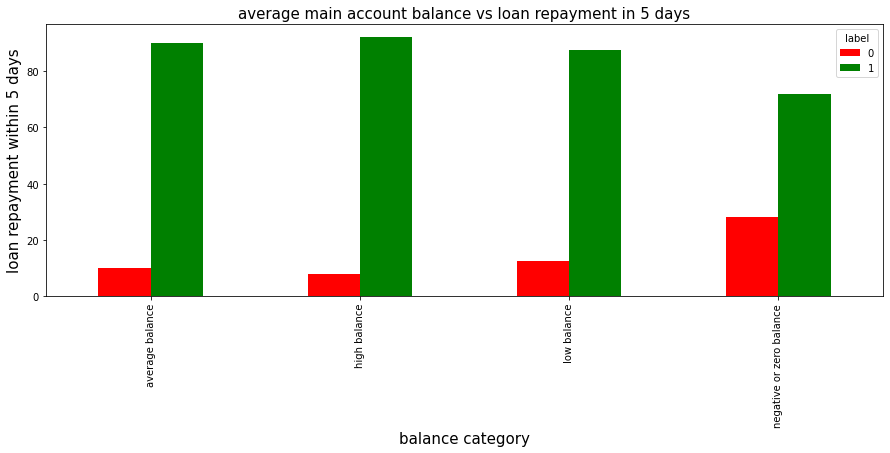

In [53]:
## graphical representation of users balance along with label and their ability to pay the bill
balance_category_percent.plot(kind='bar',color='rgymck',figsize=(15,5))
plt.title('average main account balance vs loan repayment in 5 days',fontsize=15)
plt.ylabel('loan repayment within 5 days',fontsize=15)
plt.xlabel('balance category',fontsize=15)

### from the above graph it is clear 
### 28% users have negative or zero balance
### users having high balance are not defaulter

# feature cntloan90: number of loans taken by the user in 90 days vs loan repayment within 5 days

In [54]:
condition_2=[(df_visual['cnt_loans90']<=0),df_visual['cnt_loans90'].between(0,2),(df_visual['cnt_loans90']>2)]
values_2 = ['no loan taken','average loan taken','too much loan taken']
df_visual['loans_frequency']=np.select(condition_2,values_2)

In [55]:
df_visual['loans_frequency'].value_counts()

average loan taken     163223
too much loan taken     31902
no loan taken            1949
Name: loans_frequency, dtype: int64

### users who have taken average loans are more in number

In [56]:
loans_frequency_percent = pd.crosstab(df_visual['label'],df_visual['loans_frequency']).apply(lambda x:x/x.sum()*100)
loans_frequency_percent = loans_frequency_percent.transpose()
loans_frequency_percent

label,0,1
loans_frequency,,
average loan taken,13.882235,86.117765
no loan taken,0.000000,100.000000
too much loan taken,1.159802,98.840198


(array([0, 1, 2]),
 [Text(0, 0, 'average loan taken'),
  Text(1, 0, 'no loan taken'),
  Text(2, 0, 'too much loan taken')])

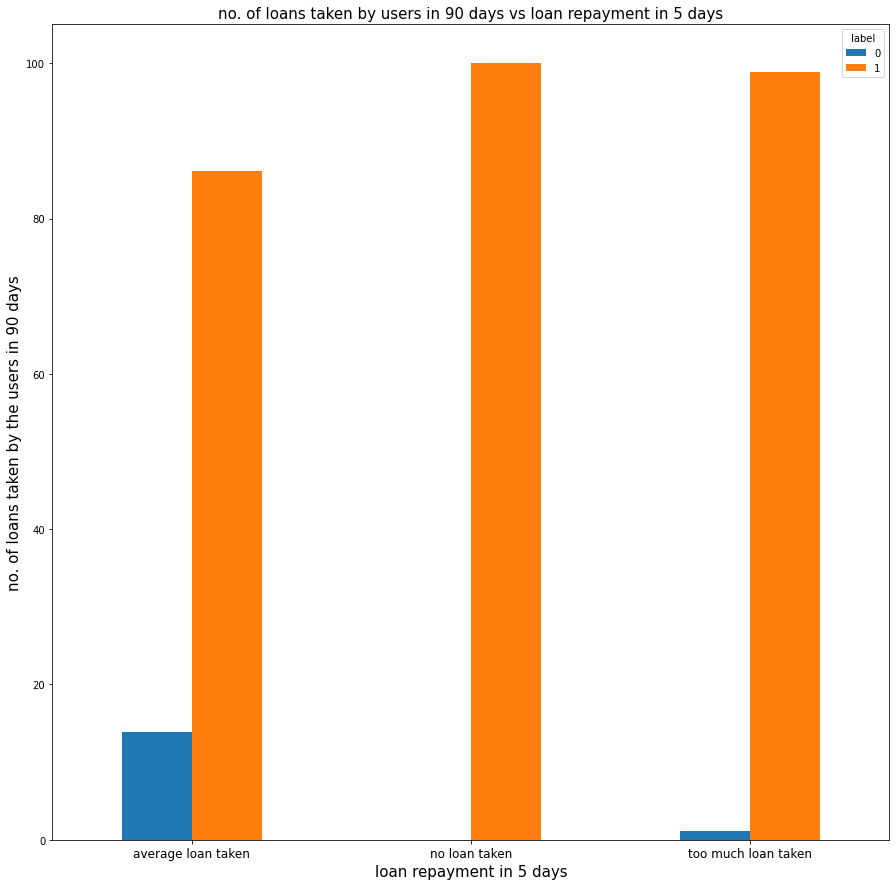

In [57]:
# graphical representation of the users whether they can pay the loan in 5 days
loans_frequency_percent.plot(kind='bar',figsize=(15,15))
plt.title('no. of loans taken by users in 90 days vs loan repayment in 5 days',fontsize=15)
plt.xlabel('loan repayment in 5 days',fontsize=15)
plt.ylabel('no. of loans taken by the users in 90 days',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=12)

## too much loan taken by users will pay the loan within 5 days and have least defaulters
## average loan taken by the user have more defaulters

## feature sumamnt_rech_90 vs loan repayment within 5 days

In [58]:
condition_3=[(df_visual['sumamnt_ma_rech90']<=0),df_visual['sumamnt_ma_rech90'].between(0,12),df_visual['sumamnt_ma_rech90'].between(12,15),(df_visual['sumamnt_ma_rech90']>15)]
values_3 = ['no recharge','between 0 and 12 ','between 12 and 15','more than 15']
df_visual['recharge_amnt_category']=np.select(condition_3,values_3)

In [59]:
df_visual['recharge_amnt_category'].value_counts()

between 0 and 12     178205
no recharge           18683
between 12 and 15       186
Name: recharge_amnt_category, dtype: int64

In [60]:
recharge_amnt_category_percent = pd.crosstab(df_visual['label'],df_visual['recharge_amnt_category']).apply(lambda x:x/x.sum()*100)
recharge_amnt_category_percent=recharge_amnt_category_percent.transpose()
recharge_amnt_category_percent

label,0,1
recharge_amnt_category,,
between 0 and 12,8.696726,91.303274
between 12 and 15,0.537634,99.462366
no recharge,40.304020,59.695980


(array([0, 1, 2]),
 [Text(0, 0, 'between 0 and 12 '),
  Text(1, 0, 'between 12 and 15'),
  Text(2, 0, 'no recharge')])

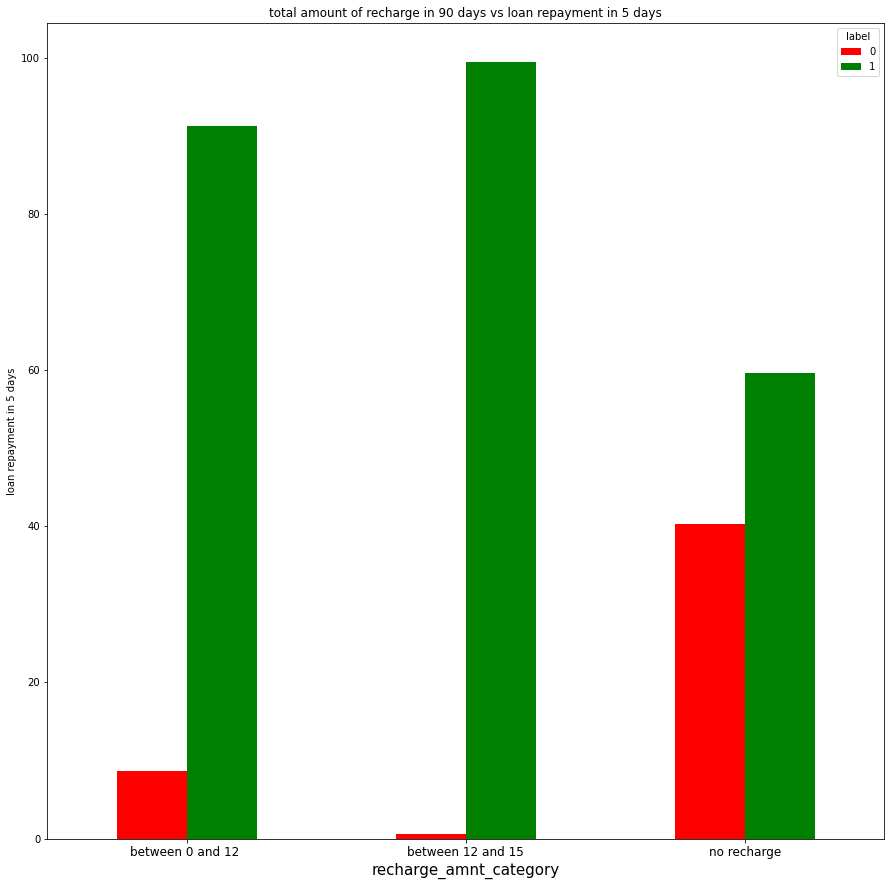

In [61]:
# graphical representation of the data
recharge_amnt_category_percent.plot(kind='bar',color='rgymck',figsize=(15,15))
plt.title('total amount of recharge in 90 days vs loan repayment in 5 days')
plt.xlabel('recharge_amnt_category',fontsize=15)
plt.ylabel('loan repayment in 5 days')
plt.xticks(rotation='horizontal',fontsize=12)

## from the above graph it is clear
## 40% of the user who donot recharge in 90 days are defaulter
##users who have high recharge will pay their loan(they are non defaulters)
## 15 % of the users who have less recharge are defaulters

# feature payback90 vs loan repayment within 5 days

In [62]:
condition_4=[(df_visual['payback90']<=5),(df_visual['payback90']>5)]
values_4=['defaulters','not defaulters']
df_visual['defaulter category']=np.select(condition_4,values_4)

In [63]:
df_visual['defaulter category'].value_counts()

defaulters        196995
not defaulters        79
Name: defaulter category, dtype: int64

In [64]:
#mapping
defaulter_category_percent=pd.crosstab(df_visual['label'],df_visual['defaulter category']).apply(lambda x:x/x.sum()*100)
defaulter_category_percent= defaulter_category_percent.transpose()
defaulter_category_percent

label,0,1
defaulter category,,
defaulters,11.685576,88.314424
not defaulters,11.392405,88.607595


(array([0, 1]), [Text(0, 0, 'defaulters'), Text(1, 0, 'not defaulters')])

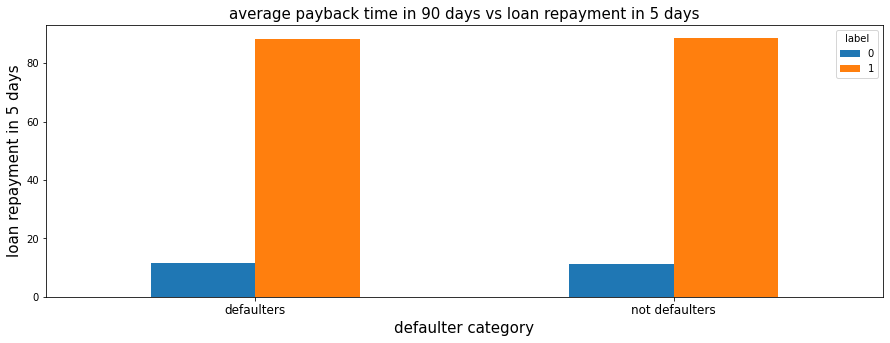

In [65]:
# graphical representation
defaulter_category_percent.plot(kind='bar',figsize=(15,5))
plt.title('average payback time in 90 days vs loan repayment in 5 days',fontsize=15)
plt.xlabel('defaulter category',fontsize=15)
plt.ylabel('loan repayment in 5 days',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=12)

# feature amnt_loan90 vs loan repayment within 5 days

In [66]:
condition_5=[df_visual['amnt_loans90']<=0,df_visual['amnt_loans90'].between(0,1),df_visual['amnt_loans90'].between(1,3),df_visual['amnt_loans90']>3]
values_5 = ['no loans','low amount','average amount','high amount']
df_visual['loan amount category']=np.select(condition_5,values_5)


In [67]:
df_visual['loan amount category'].value_counts()

average amount    122273
high amount        72852
no loans            1949
Name: loan amount category, dtype: int64

### users who take small loans are more in number

In [68]:
# mapping loan_amount_category vs loan repayment within 5 days
loan_amount_category_percent = pd.crosstab(df_visual['label'],df_visual['loan amount category']).apply(lambda x:x/x.sum()*100)
loan_amount_category_percent = loan_amount_category_percent.transpose()
loan_amount_category_percent

label,0,1
loan amount category,,
average amount,17.415128,82.584872
high amount,2.381541,97.618459
no loans,0.000000,100.000000


(array([0, 1, 2]),
 [Text(0, 0, 'average amount'),
  Text(1, 0, 'high amount'),
  Text(2, 0, 'no loans')])

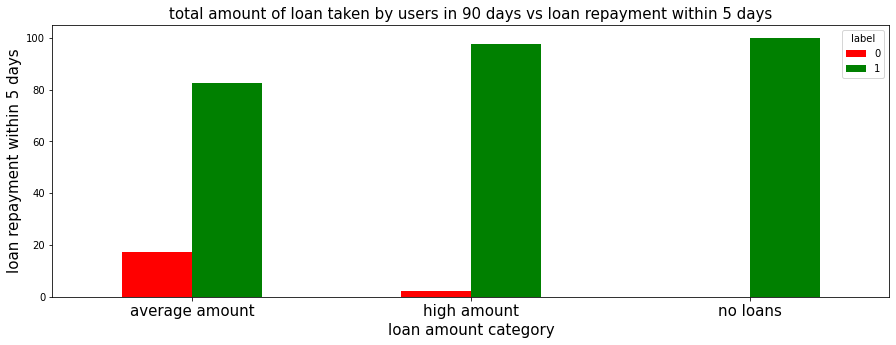

In [69]:
# graphical representation
loan_amount_category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('total amount of loan taken by users in 90 days vs loan repayment within 5 days',fontsize=15)
plt.xlabel('loan amount category',fontsize=15)
plt.ylabel('loan repayment within 5 days',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=15)


## 97% users who taken no loan are non defaulters
## 17% users who taken average amount are defaulters

# feature cnt_ma_rech90 vs loan repayment within 5 days

In [70]:
condition_6=[(df_visual['cnt_ma_rech90']<=0),df_visual['cnt_ma_rech90'].between(0,1),df_visual['cnt_ma_rech90'].between(1,3),(df_visual['cnt_ma_rech90']>3)]
values_6=['no recharge','low no. of recharge','average no. of recharge','high no. of recharge']
df_visual['recharge frequency']=np.select(condition_6,values_6)

In [71]:
df_visual['recharge frequency'].value_counts()

average no. of recharge    142698
low no. of recharge         25315
no recharge                 18683
high no. of recharge        10378
Name: recharge frequency, dtype: int64

In [72]:
# mapping the feature
recharge_frequency_percent = pd.crosstab(df_visual['label'],df_visual['recharge frequency']).apply(lambda x:x/x.sum()*100)
recharge_frequency_percent = recharge_frequency_percent.transpose()
recharge_frequency_percent

label,0,1
recharge frequency,,
average no. of recharge,6.213121,93.786879
high no. of recharge,0.645596,99.354404
low no. of recharge,25.937191,74.062809
no recharge,40.304020,59.695980


(array([0, 1, 2, 3]),
 [Text(0, 0, 'average no. of recharge'),
  Text(1, 0, 'high no. of recharge'),
  Text(2, 0, 'low no. of recharge'),
  Text(3, 0, 'no recharge')])

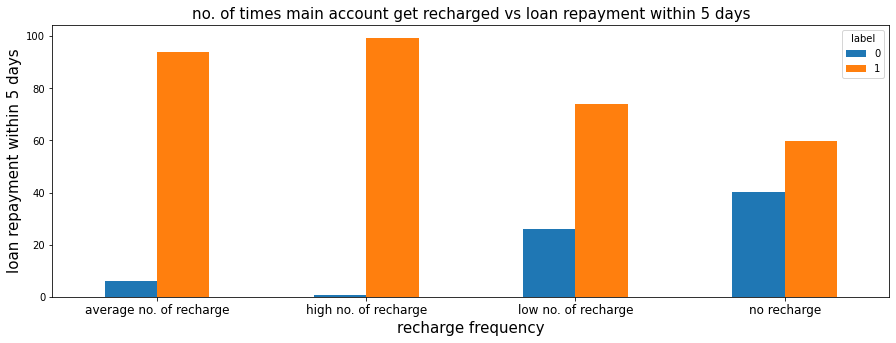

In [73]:
# graphical representation
recharge_frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('no. of times main account get recharged vs loan repayment within 5 days',fontsize=15)
plt.xlabel('recharge frequency',fontsize=15)
plt.ylabel('loan repayment within 5 days',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=12)

## 40% user have not recharge
## 30% user have low no. of recharge
##10% users have average no. of recharge and 1% users have high no. of recharge

# features aon with loan repayment within 5 days

In [74]:
condition_7=[(df_visual['aon']<2),df_visual['aon'].between(2,5),(df_visual['aon']>5)]
values_7=['new users','average users','old users']
df_visual['users category']=np.select(condition_7,values_7)

In [75]:
df_visual['users category'].value_counts()

old users        173827
average users     23143
new users           104
Name: users category, dtype: int64

In [76]:
# mapping feature with percentage value
users_category_percent = pd.crosstab(df_visual['label'],df_visual['users category']).apply(lambda x:x/x.sum()*100)
users_category_percent = users_category_percent.transpose()
users_category_percent

label,0,1
users category,,
average users,19.418399,80.581601
new users,32.692308,67.307692
old users,10.643341,89.356659


(array([0, 1, 2]),
 [Text(0, 0, 'average users'),
  Text(1, 0, 'new users'),
  Text(2, 0, 'old users')])

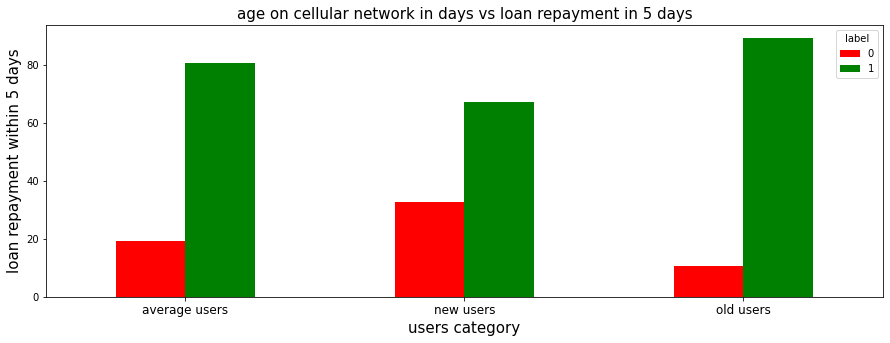

In [77]:
# graphical representation of the users vs loan repayment within 5 days
users_category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('age on cellular network in days vs loan repayment in 5 days',fontsize=15)
plt.xlabel('users category',fontsize=15)
plt.ylabel('loan repayment within 5 days',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=12)

### 32% of the users who are defaulters are new
### 20% of the users are defaulters have average time on cellphone
### 10% of the users are old who are defaulters

In [78]:
## dropping the target variable to fit in standard scaler
x2= df_clean.drop(['label'],axis=1)
x2.shape

(197074, 22)

In [79]:
y1=df_clean['label']
y1.shape

(197074,)

In [82]:
from imblearn.combine import SMOTETomek

In [83]:
smk = SMOTETomek(random_state=42)
x1,y=smk.fit_sample(x2,y1)
x1.shape, y.shape

AttributeError: 'SMOTETomek' object has no attribute 'fit_sample'